# Fit using hiperbolic function

In [38]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [39]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['interp', 'style']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Model

In [50]:
def model_function(x: float,a1: float,a2: float,a3: float):
    return a1*np.sqrt((x+a2)**2 + a3)

In [51]:
def get_extrapol_function(model_function,a1,a2,a3):
    def extrapol_funct(x):
        return model_function(x,a1,a2,a3)
    return extrapol_funct

## Read files

In [52]:
data_path = Path("../../../data/").resolve()
file = 'all_inv_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [53]:
df_all_tc

,1/nv,P1.0,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0
0,0.500000,0.662721,0.680297,0.700150,0.717028,0.734866,0.751727,0.770168,0.786703,0.803441,0.820681,0.835529
1,0.333333,0.505386,0.528284,0.546419,0.574539,0.597153,0.619581,0.642793,0.665299,0.687169,0.709461,0.732735
2,0.250000,0.425707,0.450768,0.472832,0.501265,0.528284,0.555318,0.580268,0.606328,0.631346,0.656782,0.680642
3,0.200000,0.375812,0.402337,0.429970,0.456688,0.485307,0.512765,0.541671,0.569954,0.598822,0.626314,0.653388
4,0.166667,0.341083,0.368523,0.396765,0.424721,0.455167,0.486573,0.515543,0.545704,0.574864,0.605612,0.634517
5,0.142857,0.315105,0.343136,0.372431,0.401683,0.432891,0.463020,0.495621,0.527741,0.560164,0.590963,0.622788
6,0.125000,0.294999,0.323355,0.353053,0.383836,0.415381,0.447872,0.480460,0.513612,0.546888,0.579394,0.611867
7,0.111111,0.278617,0.307334,0.337482,0.368796,0.401333,0.434561,0.468367,0.502578,0.536848,0.570911,0.604637
8,0.100000,0.265052,0.293982,0.324509,0.356434,0.389497,0.423546,0.458147,0.493491,0.528531,0.563834,0.598451
9,0.090909,0.253624,0.282715,0.313452,0.345748,0.379390,0.414121,0.449594,0.485589,0.521795,0.558070,0.593677


In [54]:
df_params_conicas = pd.DataFrame(index=["a1","a2","a3"])
df_extrapol_val = pd.DataFrame(index=["infty","1"])

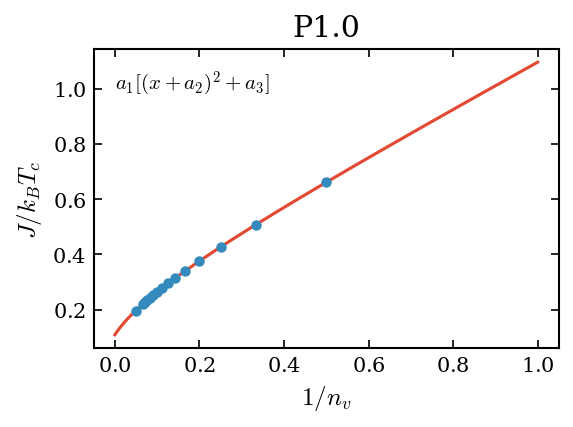

model_funt = (0.823)*((x+0.378)^2+-0.125^2)
Extrapolation:
0.10906642249171469 at 1/nv=0
1.0962433452672995 at 1/nv=1
min:0.10906642249171469 at 0.0




C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


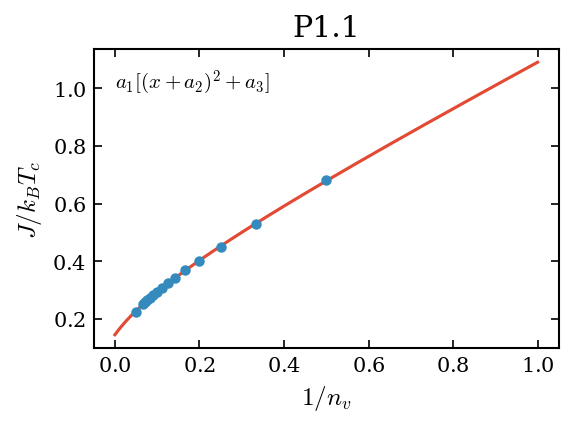

model_funt = (0.760)*((x+0.511)^2+-0.225^2)
Extrapolation:
0.14500250947768994 at 1/nv=0
1.0904164972247505 at 1/nv=1
min:0.14500250947768994 at 0.0




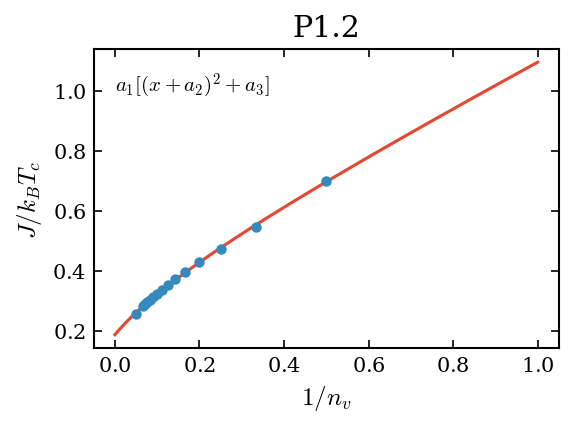

model_funt = (0.725)*((x+0.607)^2+-0.301^2)
Extrapolation:
0.18776168582254946 at 1/nv=0
1.0943642304012795 at 1/nv=1
min:0.18776168582254946 at 0.0




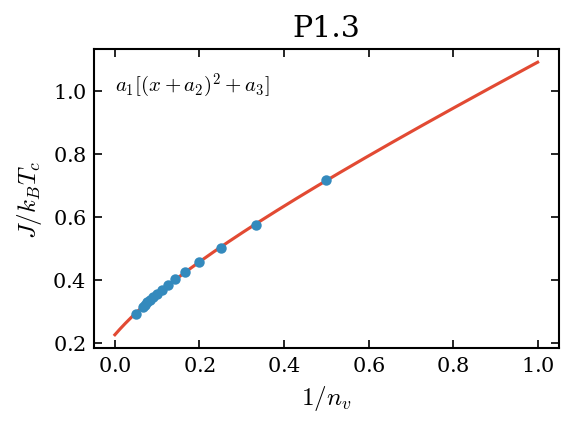

model_funt = (0.660)*((x+0.807)^2+-0.534^2)
Extrapolation:
0.22614445046873982 at 1/nv=0
1.0903734797550622 at 1/nv=1
min:0.22614445046873982 at 0.0




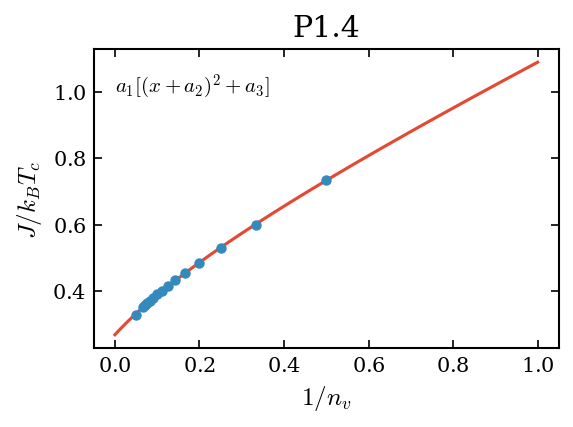

model_funt = (0.605)*((x+1.021)^2+-0.845^2)
Extrapolation:
0.26835017100114783 at 1/nv=0
1.0882239511687415 at 1/nv=1
min:0.26835017100114783 at 0.0




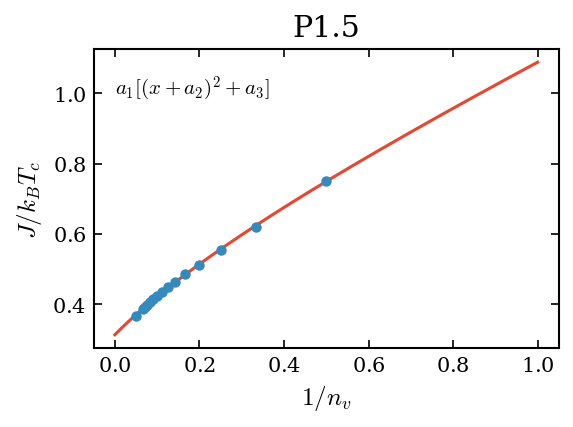

model_funt = (0.566)*((x+1.195)^2+-1.124^2)
Extrapolation:
0.3130098490661035 at 1/nv=0
1.0890514003304805 at 1/nv=1
min:0.3130098490661035 at 0.0




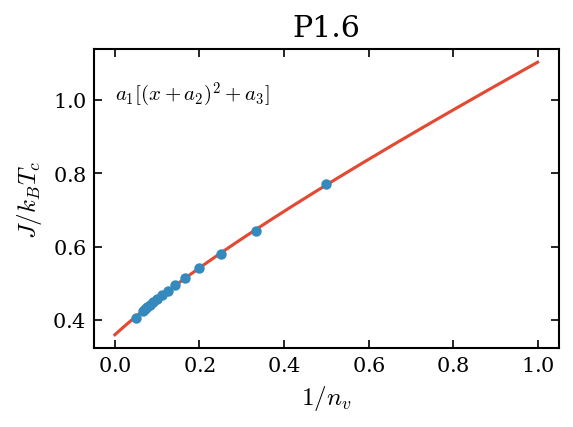

model_funt = (0.575)*((x+1.141)^2+-0.911^2)
Extrapolation:
0.3599589170749024 at 1/nv=0
1.1027042889738956 at 1/nv=1
min:0.3599589170749024 at 0.0




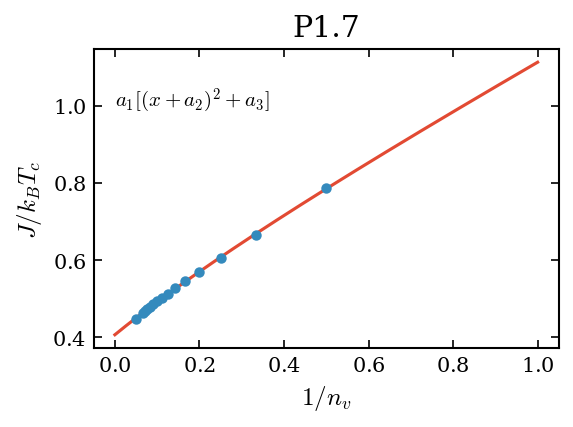

model_funt = (0.586)*((x+1.064)^2+-0.649^2)
Extrapolation:
0.4070974890527721 at 1/nv=0
1.1127531498828866 at 1/nv=1
min:0.4070974890527721 at 0.0




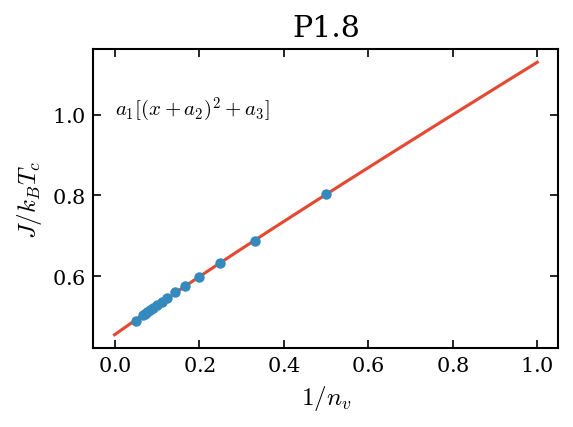

model_funt = (0.626)*((x+0.864)^2+-0.218^2)
Extrapolation:
0.4548442998152057 at 1/nv=0
1.1294204940992671 at 1/nv=1
min:0.4548442998152057 at 0.0




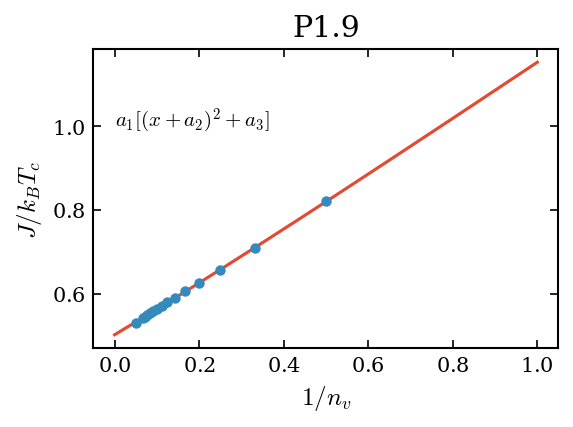

model_funt = (0.688)*((x+0.637)^2+0.127^2)
Extrapolation:
0.502312107592725 at 1/nv=0
1.1526172218893438 at 1/nv=1
min:0.502312107592725 at 0.0




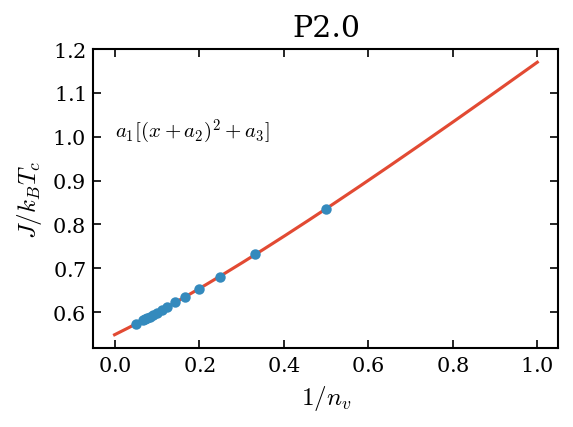

model_funt = (0.739)*((x+0.477)^2+0.322^2)
Extrapolation:
0.5483019720579358 at 1/nv=0
1.1702599483336982 at 1/nv=1
min:0.5483019720579358 at 0.0




In [55]:
COLUMNS = ["P1.0","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P1.9","P2.0"]
path_save_graph = Path("../../graphs/").resolve()
file_name_base = 'inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_v2'
for COLUMN in COLUMNS:
    file_graph = file_name_base + '_{}.png'.format(COLUMN)
    # Get the data in arrays
    df_part = df_all_tc[["1/nv",COLUMN]]
    df_part = df_part.dropna()
    x_data = df_part['1/nv'].values
    y_data = df_part[COLUMN].values
#     # add value at nv=1
#     x_data = np.concatenate([x_data,[1]])
#     y_data = np.concatenate([y_data,[1.19968]])
#     #add value at nv=infty
#     x_data = np.insert(x_data,0,0)
#     y_data = np.insert(y_data,0,0)

#     # for square
#     y_data = y_data**2    

    # fit 
    (a1,a2,a3), _= curve_fit(f=model_function,xdata=x_data,ydata=y_data,p0=[0,0.5,0])
    df_params_conicas[COLUMN] = [a1,a2,a3]
    extrapol_funct = get_extrapol_function(model_function, a1, a2, a3)

    # define the point for graph
    x_extrapol = np.linspace(0, 1, 2048)
    y_extrapol = extrapol_funct(x_extrapol)

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = False

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    # Specific heat subplot.
    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    ax.plot(x_extrapol, y_extrapol, lw=1.5)
    ax.plot(x_data, y_data, marker="o", lw=0)

    ax.set_xlabel(r"$1/n_v$")
    ax.set_ylabel(r"$J/k_BT_c$")
    # add text
    ax.text(0, 1, r"$a_1[(x+a_2)^2+a_3]$")

    ax.set_title(COLUMN)
    pyplot.draw()
#     print('Save graph {}'.format(os.path.join(path_save_graph,file_graph)))
#     pyplot.savefig(os.path.join(path_save_graph,file_graph))
    pyplot.show()
    print("model_funt = ({:.3f})*((x+{:.3f})^2+{:.3f}^2)".format(a1,a2,a3))
    print("Extrapolation:\n{} at 1/nv=0\n{} at 1/nv=1".format(extrapol_funct(0),extrapol_funct(1)))
    df_extrapol_val[COLUMN] = [extrapol_funct(0),extrapol_funct(1)]  
    print("min:{} at {}".format(np.nanmin(y_extrapol),x_extrapol[np.nanargmin(y_extrapol)]))    
    print("\n")


## Save params

In [56]:
# Define tha path and name for the csv files
file_params = os.path.join(data_path,'Extrapolation',file_name_base+'_params_curves.csv')
file_extrapol_values = os.path.join(data_path,'Extrapolation',file_name_base+'_extrapol_values.csv')
print(df_params_conicas)
print("Exporting to csv files the params adjusted {}".format(file_params))
df_params_conicas.to_csv(file_params)
print(df_extrapol_val)
print("Exporting to csv files the extrapolation values adjusted {}".format(file_extrapol_values))
df_extrapol_val.to_csv(file_extrapol_values)

        P1.0      P1.1      P1.2      P1.3      P1.4      P1.5      P1.6  \
a1  0.823363  0.760102  0.724699  0.659701  0.604714  0.566453  0.575270   
a2  0.377568  0.510795  0.606631  0.807167  1.020759  1.195487  1.141384   
a3 -0.125011 -0.224519 -0.300874 -0.534008 -0.845022 -1.123847 -0.911230   

        P1.7      P1.8      P1.9      P2.0  
a1  0.585559  0.625919  0.687889  0.739491  
a2  1.063946  0.863933  0.637180  0.477306  
a3 -0.648639 -0.218313  0.127225  0.321940  
Exporting to csv files the params adjusted C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\Extrapolation\inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_v2_params_curves.csv
           P1.0      P1.1      P1.2      P1.3      P1.4      P1.5      P1.6  \
infty  0.109066  0.145003  0.187762  0.226144  0.268350  0.313010  0.359959   
1      1.096243  1.090416  1.094364  1.090373  1.088224  1.089051  1.102704   

           P1.7      P1.8      P1.9      P2.0  
infty  0.407097  0.454844  

## Plot extrapol values

Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Extrapolation\square_inv_Tc_vs_inv_nv_extrapol_parabolic_3_parms_with_nv-1_v2_all_p.png


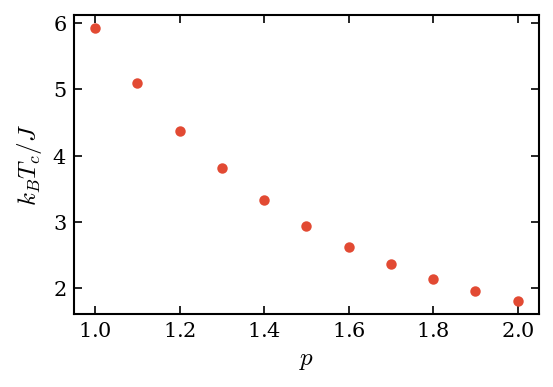

In [12]:
file_extrapol_graph = os.path.join(path_save_graph,'Extrapolation',file_name_base+'_all_p.png')
# data 
x_data = np.arange(1,2.1,0.1)
y_data = 1/df_extrapol_val.loc['infty'].values

# data for squared 
y_data = np.sqrt(y_data)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_data, y_data, marker="o", lw=0)

ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$k_BT_c/J$")

pyplot.draw()

print('Save graph {}'.format(file_extrapol_graph))
pyplot.savefig(file_extrapol_graph)

pyplot.show()